# Preprocessing of Scratches
## Patch Extraction

In [2]:
import numpy as np
from skimage import io
import cv2 as cv 
from glob import glob
import re
import random
import os
def pad_input(input_img,patch_size=[512,512]):
    h = input_img.shape[0]
    w = input_img.shape[1]
    hMod = h % patch_size[0]
    wMod = w % patch_size[1]
    hPad = 0
    wPad = 0
    if(hMod!=0 or wMod!=0):
        hPad = patch_size[0]-hMod
        wPad = patch_size[1]-wMod
    output = np.pad(input_img, ((0, hPad),(0,wPad)), 'constant')
    return(output)

In [3]:
path = glob('/home/ubuntu/DeepMobile/data/inputScratches/**_mask**')
print((len(path)))

549


In [4]:

TrainPath = []
for i in range(len(path)):
    path1 = path[i].split('_mask')
    pathnew = path1[0] +'.'+ path1[1].split('.')[1]
    TrainPath.append(pathnew)
print (TrainPath)

['/home/ubuntu/DeepMobile/data/inputScratches/5412104278_336dacb68c.jpg', '/home/ubuntu/DeepMobile/data/inputScratches/525.png', '/home/ubuntu/DeepMobile/data/inputScratches/425.png', '/home/ubuntu/DeepMobile/data/inputScratches/622.png', '/home/ubuntu/DeepMobile/data/inputScratches/224.png', '/home/ubuntu/DeepMobile/data/inputScratches/iPhone-6-Plus.jpg', '/home/ubuntu/DeepMobile/data/inputScratches/327.png', '/home/ubuntu/DeepMobile/data/inputScratches/cracked-shattered-destroyed-iphone6s-screen-hero.jpg', '/home/ubuntu/DeepMobile/data/inputScratches/120.png', '/home/ubuntu/DeepMobile/data/inputScratches/134.png', '/home/ubuntu/DeepMobile/data/inputScratches/358.png', '/home/ubuntu/DeepMobile/data/inputScratches/161.png', '/home/ubuntu/DeepMobile/data/inputScratches/24.png', '/home/ubuntu/DeepMobile/data/inputScratches/170602084423_1_900x600.jpg', '/home/ubuntu/DeepMobile/data/inputScratches/515.png', '/home/ubuntu/DeepMobile/data/inputScratches/418.png', '/home/ubuntu/DeepMobile/dat

In [16]:
 def find_patches( class_num, num_patches,h,w,train_data):
        '''
        Helper function for sampling slices with evenly distributed classes
        INPUT:  (1) list 'training_images': all training images to select from
                (2) int 'class_num': class to sample from choice of {0, 1, 2, 3, 4}.
                (3) tuple 'patch_size': dimensions of patches to be generated defaults to 65 x 65
        OUTPUT: (1) num_samples patches from class 'class_num' randomly selected.
        '''
        patches, labels = [], []
        print( 'Finding patches of class {}...'.format(class_num))
        no = 0
        ct = 0
        while ct < num_patches:
            im_path = random.choice(train_data)
            fn = im_path.split('.')
            label = cv.imread(fn[0]+'_mask.'+fn[1],1).astype('uint8')
       
            
           
            #zeros = np.argwhere(label>1)
            #print(zeros.shape)
            # resample if class_num not in selected slice
            # while len(np.argwhere(label == class_num)) < 10:
            #     im_path = random.choice(self.train_data)
            #     fn = os.path.basename(im_path)
            #     label = io.imread('Labels/' + fn[:-4] + 'L.png')
            
            
            # select centerpix (p) and patch (p_ix)
            try:
                img = cv.imread(im_path,3).astype('uint8')
            except(Exception):
                continue
            #print(img.shape)
            try:
                p = random.choice(np.argwhere(label == 255))
                p_ix = (int(p[0]-(h/2)), int(p[0]+((h)/2)), int(p[1]-(w/2)), int(p[1]+((w)/2)))
                #print ((p_ix))
                patch = img[p_ix[0]:p_ix[1],p_ix[2]:p_ix[3],:]
                label_patch = label[p_ix[0]:p_ix[1], p_ix[2]:p_ix[3]]
            except(Exception):
                continue
            if(label_patch.shape[0]!=h or label_patch.shape[1]!=w or
               len(np.argwhere(label_patch==255))<20000 ):
                continue
            # resample it patch is empty or too close to edge
            # while patch.shape != (4, h, w) or len(np.unique(patch)) == 1:
            #     p = random.choice(np.argwhere(label == class_num))
            #     p_ix = (p[0]-(h/2), p[0]+((h+1)/2), p[1]-(w/2), p[1]+((w+1)/2))
            #     patch = np.array([i[p_ix[0]:p_ix[1], p_ix[2]:p_ix[3]] for i in img])
           
            try:
                io.imsave('/home/ubuntu/DeepMobile/data/scratches/test_Data/train/{}.png'.format(int(no)),patch)
                io.imsave('/home/ubuntu/DeepMobile/data/scratches/test_Data/labels/{}.png'.format(int(no)),label_patch)
                ct += 1
                no +=1
                print(no)
            except(Exception):
                continue
        return np.array(patches), np.array(labels)

In [17]:
x,y = find_patches(class_num=0,h=512,w=512,train_data=TrainPath,num_patches=200)

Finding patches of class 0...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/test_Data/train/120.png is a low contrast image
  warn('%s is a low contrast image' % fname)


121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/test_Data/train/146.png is a low contrast image
  warn('%s is a low contrast image' % fname)


147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [ ]:
img

In [ ]:
np.save(arr=X,file='/home/ubuntu/MobileExtraction/Train256x324-full.npy')

In [ ]:
np.save(arr=Y,file='/home/ubuntu/MobileExtraction/Labels256x324-full.npy')

In [ ]:
import matplotlib.pyplot as plt
io.imshow(train[10,:,:])
io.show()

In [ ]:
twos = np.argwhere(labels>1)
for i in range(twos.shape[0]):
    labels[twos[i][0],twos[i][1],twos[i][2]] = 1
    print(i)

In [ ]:
np.unique(labels)

In [ ]:
train = train-np.mean(train)

In [ ]:
imgs = img - np.mean(img)

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(2) 
print(pca)

In [ ]:
train = train.reshape(220,1024*1298)

In [ ]:
from sklearn.decomposition import RandomizedPCA
ipca = PCA(svd_solver='randomized',iterated_power=10,n_components=400) 
ipca.fit(train)
img_c = ipca.transform(train) 
print(img_c.shape) 
print(np.sum(ipca.explained_variance_ratio_))

In [ ]:
z = img_c.reshape(220,1,12)

In [ ]:
io.imshow(z[7])

In [ ]:
x = labels[0]

In [ ]:
324*8

In [ ]:
x = cv.resize(x,(2592,2048),interpolation= cv.INTER_LANCZOS4)

In [ ]:
io.imshow(x)

In [ ]:
x = io.imread('/home/ubuntu/Desktop/DataAnnotated2/JPEGImages/353256072631204_back.png')

In [ ]:
x.shape

In [ ]:
2592-2048

In [ ]:
544/2


In [ ]:
x = x[:,272:2320]

In [ ]:
x.shape

In [ ]:
io.imshow(x)

In [ ]:
pos = np.load('/home/ubuntu/MobileExtraction/Train256x324.npy')
neg = np.load('/home/ubuntu/MobileExtraction/Train256x324-negative.npy')
posLabel = np.load('/home/ubuntu/MobileExtraction/Labels256x324.npy')
negLabel = np.zeros((47,256,324))

In [ ]:
def shuffle_in_unison(a, b):
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
for i in range(47):
    io.imshow(Y[347+i])
    io.show()

In [ ]:
X,Y = shuffle_in_unison(x,y)

In [ ]:
x = np.empty((394,256,324)).astype('float32')
y = np.zeros((394,256,324)).astype('uint8')

In [ ]:
for i in range(47):
    x[347+i]=neg[i]

In [7]:
x = io.imread('/home/ubuntu/DeepMobile/data/scratches/label/label/1.png')

/home/ubuntu/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


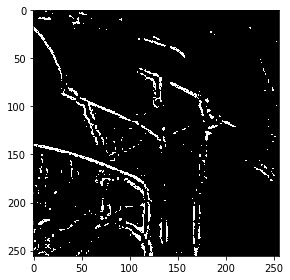

In [8]:
io.imshow(x)

In [10]:
np.min(x)

0

In [15]:
no=0
for i in range(len(TrainPath)):
    im_path = TrainPath[i]
    fn = im_path.split('.')
    label = io.imread(fn[0]+'_mask.'+fn[1])
    labelnew = np.zeros((label.shape[0],label.shape[1])).astype('uint8')
    ones = np.argwhere(label==0)
    print(ones.shape)
    for j in range(ones.shape[0]):
        labelnew[ones[j][0],ones[j][1]] = 255
    try:
        img = cv.imread(im_path,3).astype('uint8')
    except(Exception):
        print('oops')
        continue
    try:
        io.imsave('/home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/{}.jpg'.format(int(no)),img)
        io.imsave('/home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/{}_mask.jpg'.format(int(no)),labelnew)
        no+=1
        print(no)
    except(Exception):
        continue

(22680, 2)
1
(708, 2)
2
(914211, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/1_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


3
(13113490, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/3_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


4
(25904, 2)
5
(142518, 3)
6
(63841, 2)
7
(14214, 3)
8
(1121703, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/7_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


9
(392129, 2)
10
(78017, 2)
11
(2718, 3)
12
(4875, 2)
13
(1320663, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/11_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/12_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


14
(832608, 3)
15
(207141, 3)
16
(34131, 3)
oops
(669285, 3)
17
(227892, 3)
18
(32124, 3)
19
(104350, 2)
20
(22563, 3)
oops
(8856, 3)
21
(8068, 2)
22
(6283, 2)
23
(216995, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/20_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


24
(42969, 2)
25
(1180692, 3)
26
(222414, 3)
27
(123333, 3)
28
(27858, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/28_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


29
(33108, 2)
30
(258027, 2)
31
(59777, 2)
32
(41322, 3)
33
(11166, 2)
oops
(1290, 2)
34


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/33_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


(35506, 2)
35
(647760, 3)
36
(13982239, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/36_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


37
(2908, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/37_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


38
(45000, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/38_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


39
(36582, 3)
40
(9008913, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/40_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


41
(40418, 2)
oops
(543996, 3)
42
(8853, 2)
43
(400979, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/42_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


44
(3890, 2)
45
(898833, 3)
46
(118908, 3)
47
(15390, 3)
48
(9446, 2)
oops
(519303, 3)
49
(19641, 3)
50
(84495, 3)
51
(187984, 2)
52
(20364, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/52_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


53
(262431, 3)
54
(101028, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/54_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


55
(465534, 3)
56
(2652789, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/56_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/57_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/59_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


57
(6756, 3)
58
(37677, 2)
59
(9075, 3)
60
(247187, 2)
61
(31618, 2)
62
(23462, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/62_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/64_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


63
(39906, 3)
64
(18389, 2)
65
(37623, 2)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/65_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


66
(20757, 3)
67
(12026563, 3)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/67_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


68
(194061, 3)
69
(238674, 3)
70
(41046, 3)
71
(26936, 2)
72
(1127277, 3)
73
(25338, 2)
74
(53472, 2)
75
(92282, 2)
76
(12869, 2)
77
(33630, 3)
78
(964758, 3)
79
(271665, 3)
80
(65133, 3)
81
(4024, 2)
82
(5857, 2)
83
(28950, 3)
84
(2711, 2)
oops
(1622256, 3)
85
(84876, 3)
86
(10354054, 3)
87


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/DeepMobile/data/scratches/TRAIN/newdatafull/86_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
